In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


In [7]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


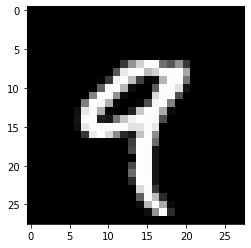

In [8]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [9]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

In [10]:
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [11]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

In [12]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


실습 2-1

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist=models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
mnist.add(layers.Dense(256,activation='relu'))
mnist.add(layers.Dense(10, activation='softmax'))

In [16]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [17]:
mnist.compile(loss='categorical_crossentropy',
             optimizer ='rmsprop',
             metrics=['accuracy'])

In [ ]:
%%time

Hist_mnist=mnist.fit(X_train, y_train,
                     epochs =100,
                     batch_size=128,
                     validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 6ms/step - loss: 0.2555 - accuracy: 0.9208 - val_loss: 0.1167 - val_accuracy: 0.9661
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0916 - accuracy: 0.9710 - val_loss: 0.0837 - val_accuracy: 0.9750
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0987 - val_accuracy: 0.9732
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0875 - val_accuracy: 0.9766
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0971 - val_accuracy: 0.9762
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0929 - val_accuracy: 0.9791
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.1094 - val_accuracy: 0.9773

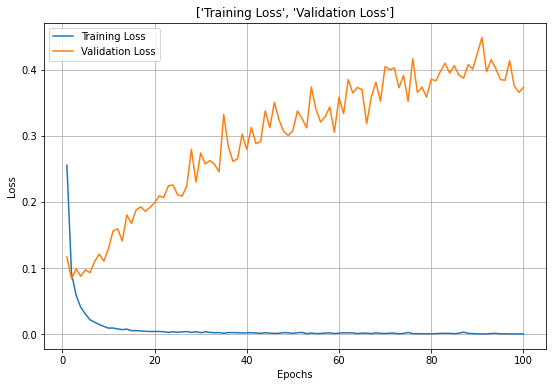

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title(['Training Loss','Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss={:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.2912 - accuracy: 0.9832
Loss=0.29117
Accuracy = 0.98320


In [ ]:
np.set_printoptions(suppress=True, precision=9)

print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
print(np.argmax(mnist.predict(X_test[:1,:])))

7


실습 2-2

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist=models.Sequential()
mnist.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
mnist.add(layers.Dense(10, activation='softmax'))

In [19]:
mnist.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [20]:
mnist.compile(loss='categorical_crossentropy',
             optimizer ='rmsprop',
             metrics=['accuracy'])

In [21]:
%%time

Hist_mnist=mnist.fit(X_train, y_train,
                     epochs =100,
                     batch_size=128,
                     validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 5ms/step - loss: 0.3158 - accuracy: 0.9106 - val_loss: 0.1748 - val_accuracy: 0.9492
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1394 - accuracy: 0.9591 - val_loss: 0.1180 - val_accuracy: 0.9668
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0948 - accuracy: 0.9716 - val_loss: 0.0980 - val_accuracy: 0.9703
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0697 - accuracy: 0.9802 - val_loss: 0.0910 - val_accuracy: 0.9721
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0541 - accuracy: 0.9845 - val_loss: 0.0887 - val_accuracy: 0.9747
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0430 - accuracy: 0.9875 - val_loss: 0.0805 - val_accuracy: 0.9762
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0349 - accuracy: 0.9899 - val_loss: 0.0781 - val_accuracy: 0.9762

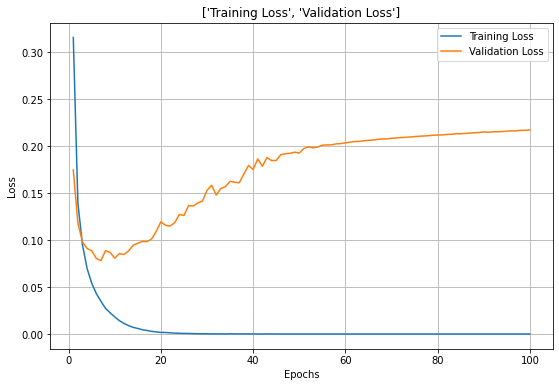

In [22]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title(['Training Loss','Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [23]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss={:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1807 - accuracy: 0.9810
Loss=0.18072
Accuracy = 0.98100


실습 2-3

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

mnist=models.Sequential()
mnist.add(layers.Dense(512, activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape=(28*28,)))
mnist.add(layers.Dense(256,activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.Dense(10, activation='softmax'))

mnist.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [28]:
mnist.compile(loss='categorical_crossentropy',
             optimizer ='rmsprop',
             metrics=['accuracy'])


In [ ]:
%%time

Hist_mnist=mnist.fit(X_train, y_train,
                     epochs =100,
                     batch_size=128,
                     validation_split=0.2)

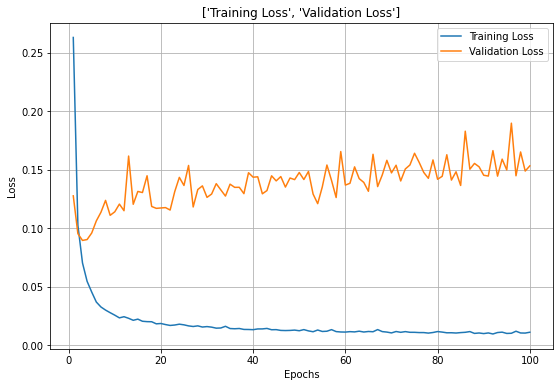

In [30]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title(['Training Loss','Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [31]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss={:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1314 - accuracy: 0.9792
Loss=0.13141
Accuracy = 0.97920


실습 2-4

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist=models.Sequential()
mnist.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
mnist.add(layers.Dropout(0.4))
mnist.add(layers.Dense(256,activation='relu'))
mnist.add(layers.Dropout(0.2))
mnist.add(layers.Dense(10, activation='softmax'))

In [41]:
mnist.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [34]:
mnist.compile(loss='categorical_crossentropy',
             optimizer ='rmsprop',
             metrics=['accuracy'])

In [35]:
%%time

Hist_mnist=mnist.fit(X_train, y_train,
                     epochs =100,
                     batch_size=128,
                     validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.3235 - accuracy: 0.9006 - val_loss: 0.1425 - val_accuracy: 0.9582
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1475 - accuracy: 0.9551 - val_loss: 0.1050 - val_accuracy: 0.9682
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.1113 - accuracy: 0.9671 - val_loss: 0.0951 - val_accuracy: 0.9718
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0919 - accuracy: 0.9727 - val_loss: 0.0892 - val_accuracy: 0.9760
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0796 - accuracy: 0.9773 - val_loss: 0.0877 - val_accuracy: 0.9764
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0697 - accuracy: 0.9789 - val_loss: 0.0897 - val_accuracy: 0.9778
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.0644 - accuracy: 0.9810 - val_loss: 0.0950 - val_accuracy: 0.9772

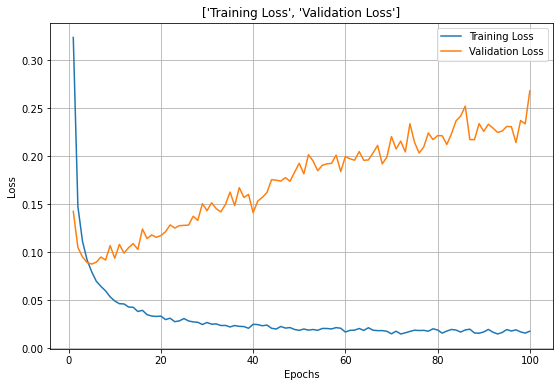

In [36]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title(['Training Loss','Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [37]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss={:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.2202 - accuracy: 0.9831
Loss=0.22018
Accuracy = 0.98310


실습 2-5

In [42]:
from tensorflow.keras import models
from tensorflow.keras import layers

mnist=models.Sequential()
mnist.add(layers.Dense(512, input_shape=(28*28,)))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(256))
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation('relu'))
mnist.add(layers.Dense(10, activation='softmax'))

mnist.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

In [43]:
mnist.compile(loss='categorical_crossentropy',
             optimizer ='rmsprop',
             metrics=['accuracy'])

In [44]:
%%time

Hist_mnist=mnist.fit(X_train, y_train,
                     epochs =100,
                     batch_size=128,
                     validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 0.1820 - accuracy: 0.9456 - val_loss: 0.1003 - val_accuracy: 0.9707
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0720 - accuracy: 0.9773 - val_loss: 0.0862 - val_accuracy: 0.9743
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.0905 - val_accuracy: 0.9751
Epoch 4/100
375/375 [==============================] - 2s 7ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0876 - val_accuracy: 0.9764
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0225 - accuracy: 0.9933 - val_loss: 0.0925 - val_accuracy: 0.9767
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.1002 - val_accuracy: 0.9768
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0950 - val_accuracy: 0.9791

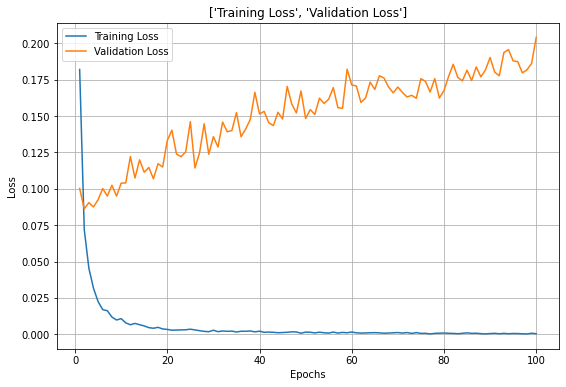

In [47]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title(['Training Loss','Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [46]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss={:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1712 - accuracy: 0.9822
Loss=0.17121
Accuracy = 0.98220
